In [3]:
import numpy as np
import pandas as pd
import kagglehub
import os

In [4]:
df1 = pd.read_csv('/content/train.csv')

In [5]:
df2 = pd.read_csv('/content/test.csv')

In [6]:
df = pd.concat([df1,df2])

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)

In [10]:
df.isnull().sum()

,0
Survived,418
Pclass,0
Sex,0
Age,263
Fare,1
Embarked,2


In [11]:
df['Survived'].fillna(df['Survived'].mean(),inplace=True)

/tmp/ipython-input-2983833627.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Survived'].fillna(df['Survived'].mean(),inplace=True)


In [12]:
df['Embarked'].fillna('S',inplace=True)

/tmp/ipython-input-3895404187.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S',inplace=True)


In [13]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/tmp/ipython-input-694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [14]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

/tmp/ipython-input-1005235208.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].mean(),inplace=True)


In [15]:
df.dtypes

,0
Survived,float64
Pclass,int64
Sex,object
Age,float64
Fare,float64
Embarked,object


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [17]:
df['Embarked'] = le.fit_transform(df['Embarked'])

In [18]:
df.dtypes

,0
Survived,float64
Pclass,int64
Sex,int64
Age,float64
Fare,float64
Embarked,int64


In [19]:
df['Survived'] = df['Survived'].astype(int)

In [20]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.000000,7.2500,2
1,1,1,0,38.000000,71.2833,0
2,1,3,0,26.000000,7.9250,2
3,1,1,0,35.000000,53.1000,2
4,0,3,1,35.000000,8.0500,2
...,...,...,...,...,...,...
413,0,3,1,29.881138,8.0500,2
414,0,1,0,39.000000,108.9000,0
415,0,3,1,38.500000,7.2500,2
416,0,3,1,29.881138,8.0500,2


In [21]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived',axis=1)
y = df['Survived']

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
df.to_csv("Titanic",index=False)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
lg = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [26]:
lg.fit(x_train,y_train)
dt.fit(x_train,y_train)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [27]:
print("Accuracy of Logistic Regression", accuracy_score(y_test,lg.predict(x_test)))
print("Accuracy of Decision Tree ", accuracy_score(y_test,dt.predict(x_test)))
print("Accuracy of Knn is " , accuracy_score(y_test,knn.predict(x_test)))

Accuracy of Logistic Regression 0.7633587786259542
Accuracy of Decision Tree  0.7175572519083969
Accuracy of Knn is  0.7099236641221374


In [28]:
cm1 = confusion_matrix(y_test,lg.predict(x_test))
cm2 = confusion_matrix(y_test,dt.predict(x_test))
cm3 = confusion_matrix(y_test,knn.predict(x_test))

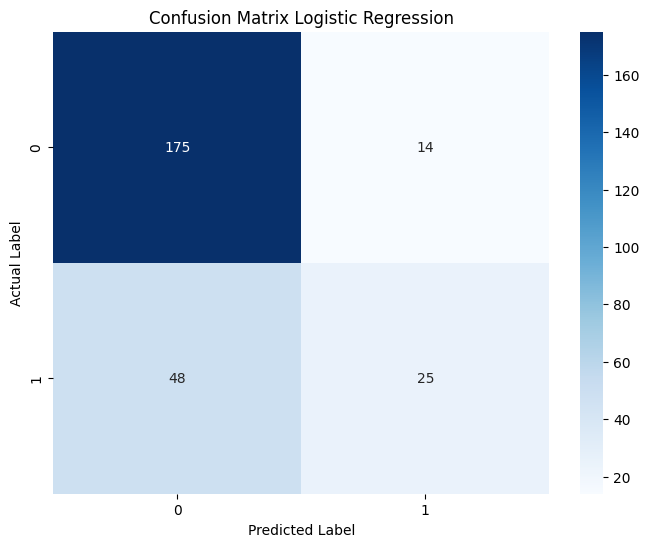

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Logistic Regression')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

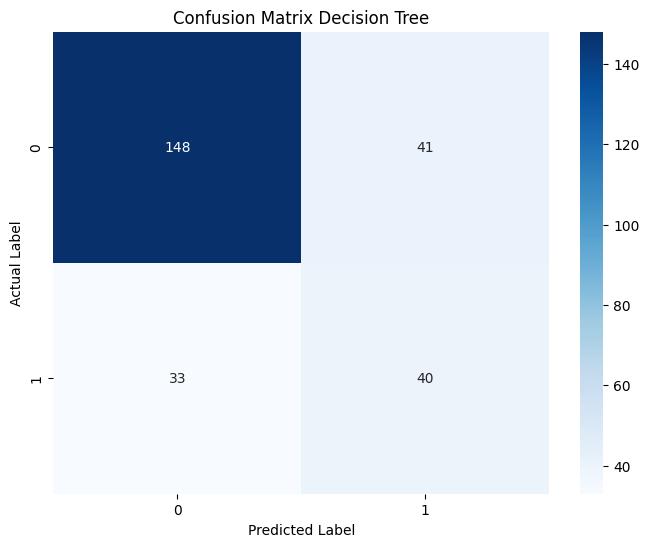

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Decision Tree')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

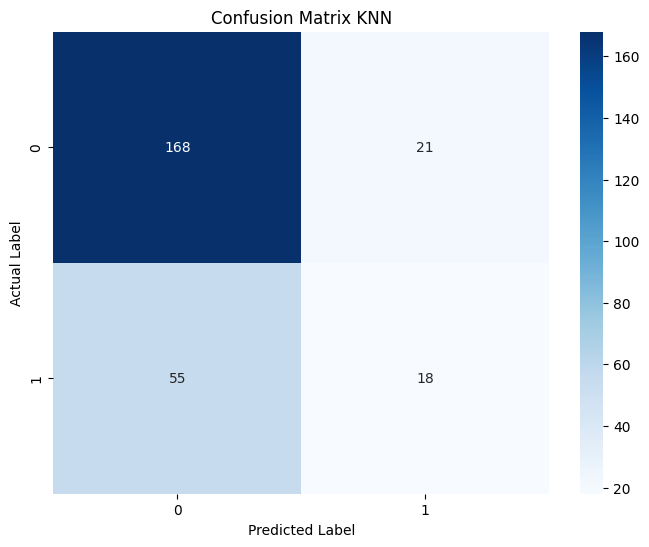

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix KNN')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Lets find best parameters for this on all

In [32]:
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': stats.loguniform(1e-3, 1e2),
    'solver': ['liblinear', 'saga'],   # removed 'newton-cg' (not compatible with l1/elasticnet)
    'max_iter': [100, 200, 500],       # cleaner values, avoid very small like 10 or 50
    'class_weight': ['balanced', None],
    'l1_ratio': [0.1, 0.5, 0.9]        # only works when penalty='elasticnet' and solver='saga'
}

reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=param_dist,
    n_iter=30,   # number of random samples
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    scoring='accuracy'
)



In [33]:
reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=30, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78e2b6b5f4a0>,
                                        'class_weight': ['balanced', None],
                                        'l1_ratio': [0.1, 0.5, 0.9],
                                        'max_iter': [100, 200, 500],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='accuracy', verbose=1)

In [34]:
reg.best_score_

np.float64(0.784151287309182)

In [35]:
reg.best_params_

{'C': np.float64(4.073745196058386),
 'class_weight': None,
 'l1_ratio': 0.5,
 'max_iter': 200,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [36]:
param_grid2 = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 4, 8, 10, 13],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [2, 4, 5],   # added smaller option for flexibility
    'min_samples_split': [2, 5, 10], # new param, controls internal node splits
    'class_weight': [None, 'balanced']
}
rcv = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_grid2,
    n_iter=10,
    cv=5,
    random_state=4,
    n_jobs=-1,      # parallel processing
    verbose=1       # optional, shows progress
)

In [37]:
rcv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 8, 10, 13],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [2, 4, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=4, verbose=1)

In [38]:
rcv.best_score_

np.float64(0.7927500569605832)

In [39]:
rcv.best_params_

{'splitter': 'random',
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'gini',
 'class_weight': None}

In [40]:
param_dist3 = {
    'n_neighbors': np.arange(1, 17),       # try neighbors from 1 to 30
    'weights': ['uniform', 'distance'],    # equal or weighted by distance
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2,3]                            # 1=manhattan, 2=euclidean
}

# RandomizedSearchCV setup
rcv2 = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_dist3,
    n_iter=20,          # number of random samples to test
    cv=5,               # 5-fold cross validation
    random_state=42,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'  # or 'f1' if imbalanced
)


In [41]:
rcv2.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy', verbose=1)

In [42]:
rcv2.best_score_

np.float64(0.7421052631578947)

In [43]:
rcv2.best_params_

{'weights': 'uniform',
 'p': 2,
 'n_neighbors': np.int64(4),
 'metric': 'manhattan'}

<h1> Now we have got best parameters for all . Need is now to use voting and Bagging classifier to get best results </h1>

In [44]:
lrr = LogisticRegression(C=4.073745196058386,
    class_weight=None,
    max_iter=200,
    penalty='l1',
    solver='liblinear')

dtt = DecisionTreeClassifier(splitter='random',
    min_samples_split=2,
    min_samples_leaf=2,
    max_features=None,
    max_depth=4,
    criterion='entropy',
    class_weight=None,
    random_state=42)

knnn = KNeighborsClassifier(
    weights='uniform',
    p=2,
    n_neighbors=5,
    metric='manhattan'
)

In [45]:
estimators = [('lr',lrr),('dt',dtt),('knn',knnn)]

In [46]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [47]:
vr = VotingClassifier(estimators)
scores = cross_val_score(vr,X,y,scoring='accuracy',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.78


In [48]:
vr.fit(x_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=4.073745196058386,
                                                 max_iter=200, penalty='l1',
                                                 solver='liblinear')),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=4,
                                                     min_samples_leaf=2,
                                                     random_state=42,
                                                     splitter='random')),
                             ('knn', KNeighborsClassifier(metric='manhattan'))])

In [49]:
rmm = confusion_matrix(y_test,vr.predict(x_test))

In [50]:
accuracy_score(y_test,vr.predict(x_test)) #highest so far

0.7748091603053435

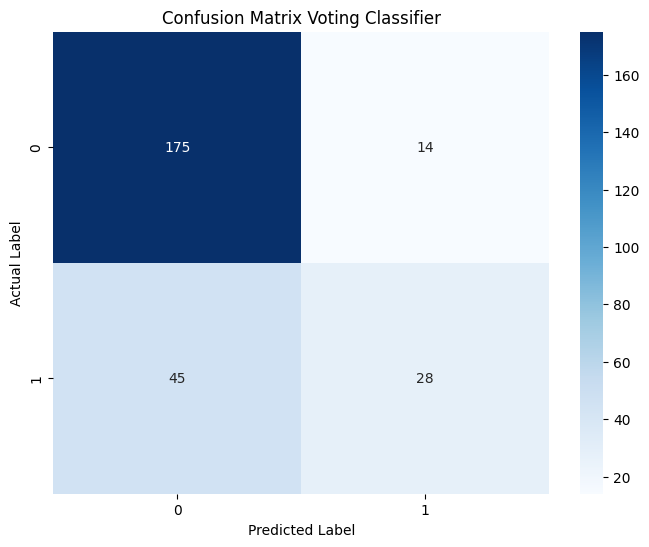

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(rmm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Voting Classifier')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

<h1> Lets try Bagging </h1>

In [52]:
x_train.shape

(1047, 5)

In [53]:
bag = BaggingClassifier(
  estimator=DecisionTreeClassifier(),
    n_estimators=700,
    max_samples=0.25, #row sampling
    bootstrap=True, #pasting vs bagging
    #max_features=0.5, #column sampling
    bootstrap_features=False,
    random_state=42,
    n_jobs=-1
)

In [54]:
bag.fit(x_train,y_train)
y_pred = bag.predict(x_test)
print("Accuracy of Bagging",accuracy_score(y_test,y_pred)) #highest so far

Accuracy of Bagging 0.7938931297709924


In [55]:
x_train.shape

(1047, 5)

In [56]:
bag.estimators_samples_[0].shape #rows

(261,)

In [57]:
cf = confusion_matrix(y_test,bag.predict(x_test))

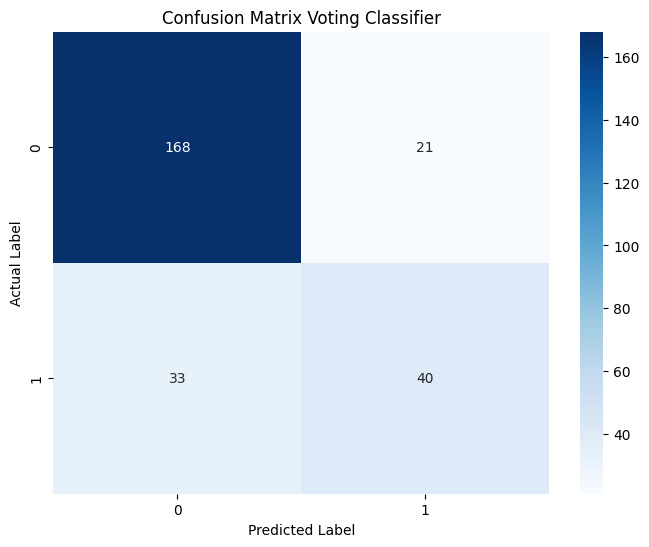

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Voting Classifier')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [59]:
bag2 = BaggingClassifier(
  estimator=LogisticRegression(),
    n_estimators=40,
    max_samples=0.5, #row sampling
    bootstrap=False, #pasting vs bagging
    #max_features=0.5, #column sampling
    bootstrap_features=False,
    random_state=42,
    n_jobs=-1
)

In [60]:
bag2.fit(x_train,y_train)
y_pred = bag2.predict(x_test)
print("Accuracy of Bagging",accuracy_score(y_test,y_pred)) #best of this is 0.81 with parameter tunning

Accuracy of Bagging 0.7633587786259542


In [61]:
cf2 = confusion_matrix(y_test,bag2.predict(x_test))

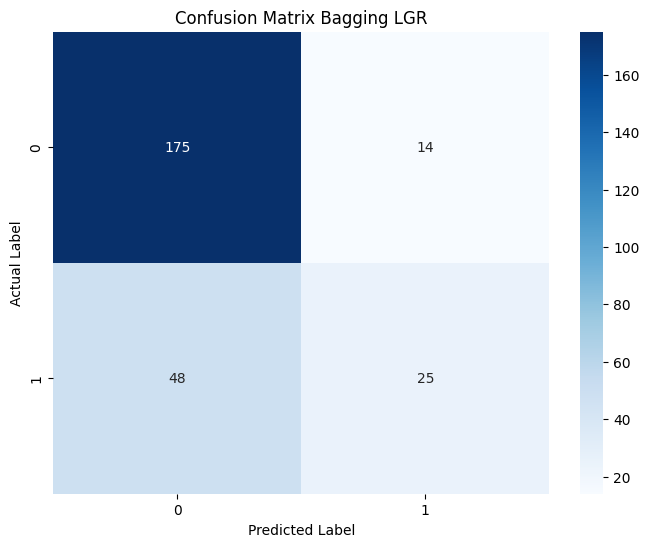

In [62]:
plt.figure(figsize=(8, 6))
sns.heatmap(cf2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Bagging LGR')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

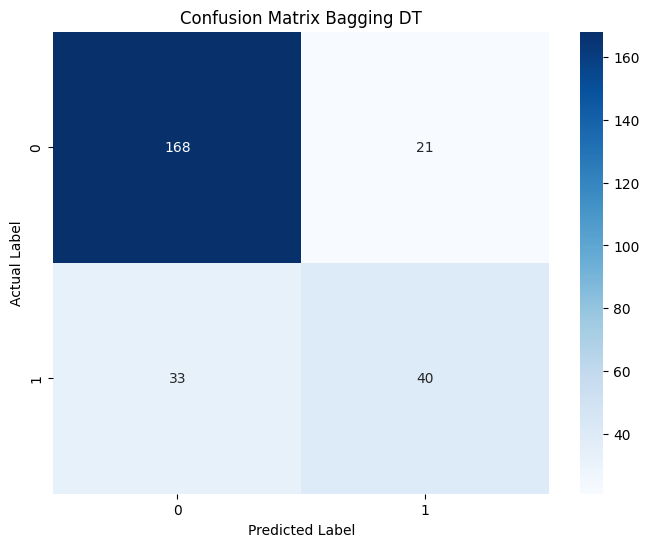

In [63]:
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Bagging DT')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [64]:
bag3 = BaggingClassifier(
  estimator=KNeighborsClassifier(),
    n_estimators=400,
    max_samples=0.3, #row sampling
    bootstrap=False, #pasting vs bagging
    #max_features=0.5, #column sampling
    random_state=42,
    n_jobs=-1
)

In [65]:
bag3.fit(x_train,y_train)
y_pred = bag3.predict(x_test)
print("Accuracy of Bagging",accuracy_score(y_test,y_pred))

Accuracy of Bagging 0.7442748091603053


In [66]:
cf3 = confusion_matrix(y_test,bag3.predict(x_test))

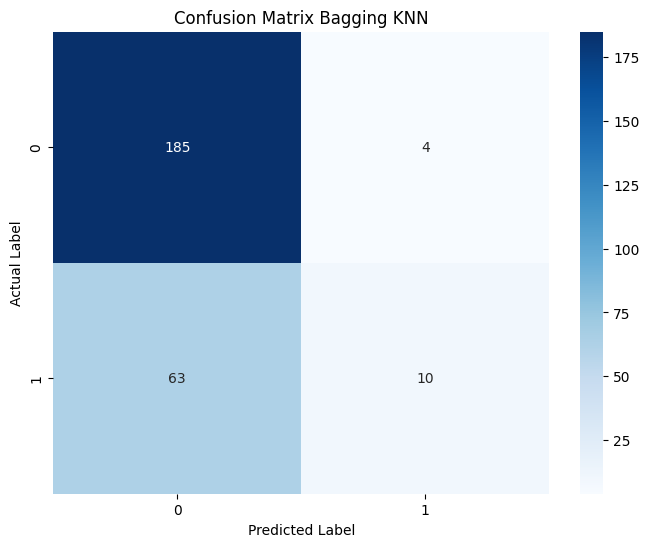

In [67]:
plt.figure(figsize=(8, 6))
sns.heatmap(cf3, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Bagging KNN')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

<h1> Best Score so far </h1>

In [68]:
accuracy_score(y_test,bag.predict(x_test))

0.7938931297709924

In [69]:
tit = pd.read_csv('/content/Titanic')

In [70]:
tit.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2


In [71]:
x = tit.drop('Survived',axis=1)
y = tit['Survived']

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [74]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [75]:
accuracy_score(y_test,rf.predict(x_test))

0.7366412213740458

In [76]:
confusion_matrix(y_test,rf.predict(x_test))

array([[153,  36],
       [ 33,  40]])

<h2> Lets do hyperparameter tunning </h2>

In [100]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [101]:
param_grid = {
    'n_estimators': [100, 200, 300],            # Number of trees
    'max_depth': [None, 10, 20, 30],            # Maximum depth of each tree
    'max_features': ['sqrt', 'log2', None],     # Number of features to consider at each split
    'min_samples_split': [2,3,4,5,6,7,8,9],            # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],              # Minimum samples required at each leaf node
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
    }             # Whether bootstrap samples are used

In [102]:
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,                  # Number of random combinations to try
    cv=5,                       # 5-fold cross-validation
    scoring='accuracy',        # You can change this to 'f1', 'roc_auc', etc.
    random_state=42,
    n_jobs=-1                   # Use all available cores
)


In [105]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy')

In [106]:
random_search.best_score_

np.float64(0.7812850307587149)

In [108]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 20,
 'criterion': 'gini',
 'bootstrap': True}

In [107]:
accuracy_score(y_test,random_search.predict(x_test))

0.7595419847328244

In [80]:
ab = AdaBoostClassifier()
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [81]:
accuracy_score(y_test,ab.predict(x_test))

0.8053435114503816

In [82]:
confusion_matrix(y_test,ab.predict(x_test))

array([[174,  15],
       [ 36,  37]])

In [83]:
import random
from scipy.stats import randint, uniform

In [109]:
param_dist = {
    'n_estimators': randint(50, 200),           # Number of boosting rounds
    'learning_rate': uniform(0.01, 1.0),        # Contribution of each weak learner
    'algorithm': ['SAMME', 'SAMME.R']           # Boosting algorithm
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=ab,
    param_distributions=param_dist,
    n_iter=50,                  # Number of random combinations to try
    cv=5,                       # 5-fold cross-validation
    scoring='accuracy',        # You can change this to 'f1', 'roc_auc', etc.
    random_state=42,
    n_jobs=-1                   # Use all available cores
)

In [110]:
random_search.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
110 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/util

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78e2b0e76300>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78e2b0e9d310>},
                   random_state=42, scoring='accuracy')

In [111]:
random_search.best_score_

np.float64(0.7803372066529961)

In [112]:
random_search.best_params_

{'algorithm': 'SAMME',
 'learning_rate': np.float64(0.9318742350231168),
 'n_estimators': 89}

In [113]:
accuracy_score(y_test,random_search.predict(x_test))

0.8053435114503816

In [115]:
confusion_matrix(y_test,random_search.predict(x_test))

array([[174,  15],
       [ 36,  37]])

In [85]:
import joblib

# Save
joblib.dump(bag, "bagging_model.pkl")

# Load
model = joblib.load("bagging_model.pkl")

In [86]:
dft = pd.read_csv('/content/test.csv')

In [87]:
dft.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)

In [88]:
dft

,Pclass,Sex,Age,Fare,Embarked
0,3,male,34.5,7.8292,Q
1,3,female,47.0,7.0000,S
2,2,male,62.0,9.6875,Q
3,3,male,27.0,8.6625,S
4,3,female,22.0,12.2875,S
...,...,...,...,...,...
413,3,male,NaN,8.0500,S
414,1,female,39.0,108.9000,C
415,3,male,38.5,7.2500,S
416,3,male,NaN,8.0500,S


In [89]:
dft['Embarked'].fillna('S',inplace=True)
dft['Age'].fillna(dft['Age'].mean(),inplace=True)
dft['Fare'].fillna(dft['Fare'].mean(),inplace=True)
le = LabelEncoder()
dft['Sex'] = le.fit_transform(dft['Sex'])
dft['Embarked'] = le.fit_transform(dft['Embarked'])

/tmp/ipython-input-1210987631.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dft['Embarked'].fillna('S',inplace=True)
/tmp/ipython-input-1210987631.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [90]:
predictions = bag.predict(dft)

In [91]:
test = pd.read_csv('/content/test.csv')

In [92]:
output = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions
})
output.to_csv("submission.csv", index=False)